Max projections + traces + histo from one animal from each group before/after shock.

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot, FigMirror
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc
import cell_tracking as ct 

[8.5 8. ]


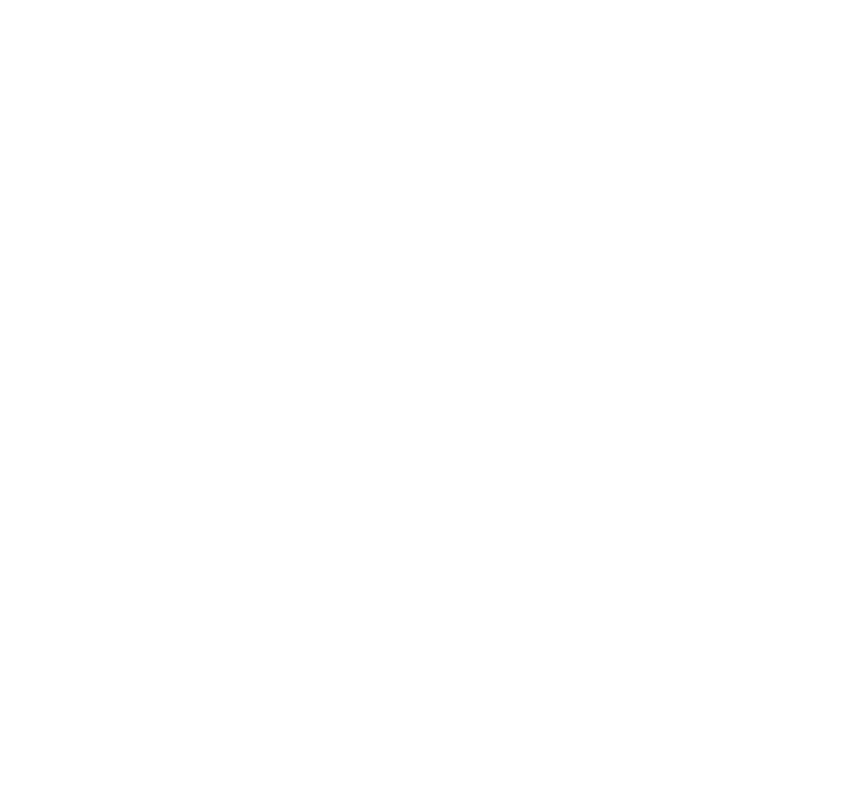

In [2]:
%matplotlib ipympl
FigS2 = Fig(num="Figure S2", grid=(5, 4), size=(8.5, 8), fontsize=6)
print(FigS2.fig.get_size_inches())

Top row: histo from 3 example animals

Next row: Learner: 1: max proj with 10 ROIs, 2: 10 corresponding traces, 3/4: ditto for day 1

Next row: same as above but for non-learner

Next row: same as above but for ANI

Bottom Row: #neurons for both groups

In [3]:
ax_nn_ctrl = FigS2.subplot(FigS2.gs[4, 0])
ax_nn_ani = FigS2.subplot(FigS2.gs[4, 1])

days = [-2, -1, 4, 1, 2, 7]

arenas = ['Shock', 'Open']
for mice, group_title, ax in zip([err.control_mice_good, err.ani_mice_good], ['Ctrl', 'ANI'], 
                                 [ax_nn_ctrl, ax_nn_ani]):

    # # Get overlapping cell ratios for each day/arena using Shock day -2 as a reference
    # pathname = r'C:\Users\kinsky.AD\Dropbox\Imaging Project\Manuscripts\Eraser\Figures'  # Plotting folder
    nneurons = ct.get_group_num_neurons(mice, days=days, arenas=arenas)
    
    ct.plot_num_neurons(nneurons, ax=ax, jitter=(-0.05, 0.05), colors=('b', 'r'), markersize=2.0)
    ax.set_title(group_title)